# <font size=8 color='voilet'> **Bank Personal Loan Modelling**. </font> <font color='green'>- Python Project </font>

# <font size=5 color='navyblue'> **Identifying the Potential Customers for Loans**. </font>
##### <p style='text-align: right;'>By: Bheemanagouda</p><font size=4 color='pink'>**************************************************************************************************************************************</font>

<font size=4 color='red'> **Domain:** </font> <font size=3> Banking and Marketing. </font>

 <font size=4 color='red'> **Objective:** </font> <font size=3>The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.</font>

### 1. Import the required libraries and read the dataset.


In [21]:
# Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
#Read the data from .csv file
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
df.shape

(5000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 3. Check if there are any duplicate records present in the dataset? If yes, drop them. and Drop the columns which you feel are redundant.

In [7]:
df[df.duplicated()]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


### 4. Check if there are any Null records present in the dataset?

In [8]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### 5. Display the Five Point Summary and write your key findings.

In [30]:
# Displaying the Five Point Summary of the DataFrame
five_point_summary = df.describe()
five_point_summary

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73774.200000,2.396400,1937.93800,1.881000,56498.800000,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46033.729321,1.147663,1747.65898,0.839869,101713.802102,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8000.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39000.000000,1.000000,700.00000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64000.000000,2.000000,1500.00000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98000.000000,3.000000,2500.00000,3.000000,101000.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224000.000000,4.000000,10000.00000,3.000000,635000.000000,1.000000,1.000000,1.00000,1.000000,1.000000


- There are some negative values in the column "Experience".

### 6. There are negative values in the variable 'Experience'. Convert them to non-negative values.

In [11]:
#printing the rows with negative Experience values
df[df['Experience']< 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [11]:
#Convering Negative values to non negative values
df['Experience'] = df['Experience'].abs()
df[df['Experience']< 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


### 7. Get the target column distribution and comment on the class distribution

In [12]:
#Drop columns which does not effect our target column 'Personal' 
#Drop Id and Zip code
df = df.drop(['ID','ZIP Code'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [13]:
df[['Income', 'CCAvg', 'Mortgage']] = df[['Income', 'CCAvg', 'Mortgage']] * 1000
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49000,4,1600.0,1,0,0,1,0,0,0
1,45,19,34000,3,1500.0,1,0,0,1,0,0,0
2,39,15,11000,1,1000.0,1,0,0,0,0,0,0
3,35,9,100000,1,2700.0,2,0,0,0,0,0,0
4,35,8,45000,4,1000.0,2,0,0,0,0,0,1


#### Get the target column distribution

In [14]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

<Axes: xlabel='Personal Loan', ylabel='count'>

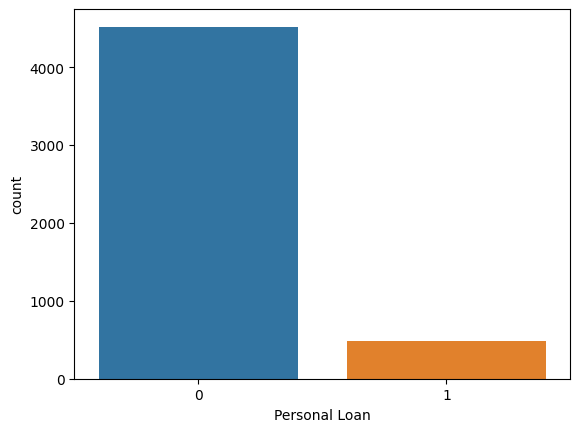

In [15]:
sns.countplot(data=df,x='Personal Loan')

### 8. Store the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the X variable.


In [16]:
# lets build our linear model
# independant variables
X = df.drop(['Personal Loan'], axis=1)
# the dependent variable
y = df['Personal Loan']

### 9. Split the dataset into two parts (i.e. 70% train and 30% test). and standardize the columns using the z-score scaling approach.

In [19]:
#split X and y in training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [22]:
# Standardizing the columns using z-score scaling approach
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 9. Train and test a Logistic Regression model to predict the likelihood of a liability customer buying personal loans. Display the train and test accuracy scores.

In [23]:
# Creating an instance of Logistic Regression
lr = LogisticRegression()

# Fitting the model to the training data
lr.fit(X_train, y_train)

# Predicting the target variable for both training and testing data
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

# Calculating the accuracy scores for both training and testing data
train_acc = lr.score(X_train, y_train)
test_acc = lr.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.9531428571428572
Testing Accuracy: 0.948


### 10. Print the confusion matrix for the model and write your conclusions on the results

In [28]:
from sklearn.metrics import confusion_matrix

# Printing the confusion matrix for the testing data
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))

Confusion Matrix:
 [[1335   16]
 [  62   87]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

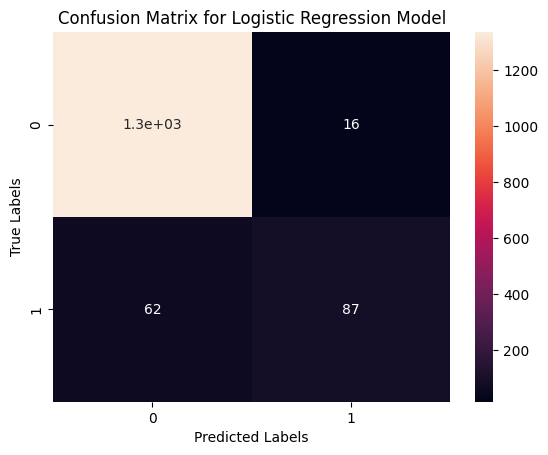

In [27]:
# Creating the confusion matrix for the testing data
cm = confusion_matrix(y_test, test_preds)

# Plotting the confusion matrix using Seaborn's heatmap function
sns.heatmap(cm, annot=True)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression Model")

The confusion matrix

- True Positives (TP): we correctly predicted that they do have Personal Loan 87

- True Negatives (TN): we correctly predicted that they don't have Personal Loan 1335

- False Positives (FP): we incorrectly predicted that they do have Personal Loan (a "Type I error") 16 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they don't have Personal Loan (a "Type II error") 62 Falsely predict negative Type II error

- Based on the confusion matrix, we can see that the Logistic Regression model we trained earlier correctly predicted 1335 samples as negative (0) and 87 samples as positive (1) in the testing data. However, it misclassified 16 samples as positive (1) which were actually negative (0), and 62 samples as negative (0) which were actually positive (1).